In [1]:
import numpy as np
import pandas as pd
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras.utils import np_utils
from keras.applications import VGG16
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from keras.regularizers import l2

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

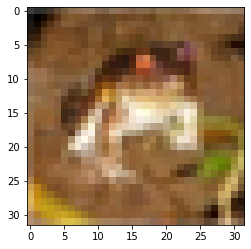

In [6]:
plt.imshow(X_train[0])

In [7]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

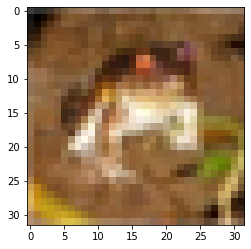

In [8]:
plt.imshow(X_train[0])


one-hot encoding is done to coonert the given data to categorical data

In [9]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
print(y_train[20])

[4]


In [11]:
print(Y_train[2301])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Initaliging the sequential Model

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(BatchNormalization(axis=3))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        3

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history=model.fit(X_train, Y_train, epochs=35, batch_size=32,validation_data=(X_test, Y_test))

Epoch 1/35
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9306 - accuracy: 0.2881 - val_loss: 1.4862 - val_accuracy: 0.4536
Epoch 2/35
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4897 - accuracy: 0.4606 - val_loss: 1.1913 - val_accuracy: 0.5752
Epoch 3/35
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2458 - accuracy: 0.5668 - val_loss: 1.0797 - val_accuracy: 0.6278
Epoch 4/35
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0905 - accuracy: 0.6281 - val_loss: 0.9189 - val_accuracy: 0.6862
Epoch 5/35
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9924 - accuracy: 0.6639 - val_loss: 0.8622 - val_accuracy: 0.7040
Epoch 6/35
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9197 - accuracy: 0.6899 - val_loss: 0.8105 - val_accuracy: 0.7249
Epoch 7/35
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8623 - accuracy: 0.7130 - val_loss: 0.7313 - val_accuracy:

In [17]:
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	

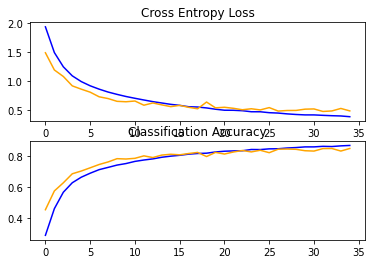

In [18]:
summarize_diagnostics(history)

In [19]:
pred = model.evaluate(X_test, Y_test)
accuracy_test=pred[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.4895 - accuracy: 0.8499


In [20]:
x_test_predict=model.predict(X_test)

AxesImage(54,36;334.8x217.44)
3
3


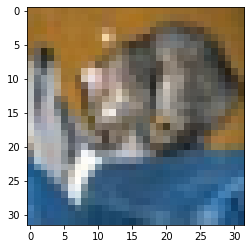

In [21]:

print(plt.imshow(X_test[0]))
print(np.argmax(Y_test[0]))
print(np.argmax(x_test_predict[0]))

Procedure help me to decrease overfit **:**

1.   Using Dropout--Help me to increase a good test accuracy as it was seen the previous VGG16 model was getting completely overfit.
2.   In pace of Random intilation of the Dense layer we can intilize by different way--he intilalizer   
3.   I have also tried weight decay but that doesnot help me

This can Also be tried out
1.   Using Different CostFunction
2.   Hyperparameter tunning by different ways(Grid,Random)
3.   Dataaugmention can also be persorm by increasing the dropout probality


